In [115]:
"""
Magic commands
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2

"""
Python standard packages
"""
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

"""
packages for dataload and simulation
"""
import ffn # data access
from arch import arch_model  # simulation
from arch.univariate import SkewStudent, GARCH, EGARCH, ARX
"""
Own packages
"""
sys.path.insert(0, "C:\\code\\speciale\\") # vesl path
sys.path.insert(0, "C:\\Users\\lucas\\OneDrive\\Skrivebord\\repo\\speciale\\") # ljb path

from stock_simulation_study.stock_environment import StockEnvironment, StockEnvironmentTwo
from stock_simulation_study.stock_agent import RLStockAgent
#==============
from stock_simulation_study.reinforce import REINFORCE_Agent
import time
#==============

import codelib  # used for extending pandas

"""
ignore warnings
"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
prices = ffn.get('aapl', start = '2018-01-01')

In [118]:
n_time_points = 2000
N_EPISODES = 1000
ticks_per_episode = 1256
nstocks = 1
lag = 1
env = StockEnvironmentTwo(prices = prices, n_time_points = n_time_points)
global env

agent = REINFORCE_Agent(state_size=nstocks*lag*2,
                        action_size=5,
                            discount_rate=0
                       )

start_time = time.time()
print("Start: %s" % (time.strftime("%H:%M:%S")))

for e in range(N_EPISODES):
    agent.run_episode(env=env)
    agent.score_episode(e, N_EPISODES)
    
    if e % 100 == 0:
        unique, counts = np.unique(agent.action_memory, return_counts=True)
        result = np.column_stack((unique, counts)) 
        print(result)
#     if e and (e+1) % agent.save_interval == 0:
#         agent.save()

elapsed_time = time.time() - start_time
print("\nTrain time: ", elapsed_time)      

Iteration:      1,   Func. Count:     13,   Neg. LLF: 9067.117061115843
Iteration:      2,   Func. Count:     29,   Neg. LLF: 48364.40143956356
Iteration:      3,   Func. Count:     45,   Neg. LLF: 42309.77629596174
Iteration:      4,   Func. Count:     61,   Neg. LLF: 76535.25602010047
Iteration:      5,   Func. Count:     76,   Neg. LLF: 29897.70296896188
Iteration:      6,   Func. Count:     90,   Neg. LLF: 30669.090886672908
Iteration:      7,   Func. Count:    104,   Neg. LLF: 22356.66905372581
Iteration:      8,   Func. Count:    119,   Neg. LLF: 31007.816314798627
Iteration:      9,   Func. Count:    133,   Neg. LLF: 52877.1270994699
Iteration:     10,   Func. Count:    147,   Neg. LLF: 3255.4739819175584
Iteration:     11,   Func. Count:    160,   Neg. LLF: 3996.81474435141
Iteration:     12,   Func. Count:    174,   Neg. LLF: 2193.4696409342005
Iteration:     13,   Func. Count:    187,   Neg. LLF: 2136.6688995995983
Iteration:     14,   Func. Count:    199,   Neg. LLF: 2136.66

C:\Users\lucas\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.

C:\Users\lucas\anaconda3\lib\site-packages\keras\engine\training.py:2470: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



[[  0 397]pisode 1/1000:, score: -2.613613509534758, 1-episode avg: -2.6 Memory: 0        
 [  1 424]
 [  2 351]
 [  3 382]
 [  4 446]]
[[  0 398]pisode 101/1000:, score: 3.4152049476093054, 10-episode avg: 1.0 Memory: 0          
 [  1 406]
 [  2 384]
 [  3 383]
 [  4 429]]
[[  0 370]pisode 201/1000:, score: 1.7183897620186928, 10-episode avg: 3.0 Memory: 0          
 [  1 356]
 [  2 362]
 [  3 408]
 [  4 504]]
[[  0 435]pisode 301/1000:, score: 15.276674950866822, 10-episode avg: 13.3 Memory: 0        
 [  1 257]
 [  2 197]
 [  3 328]
 [  4 783]]
[[  0 763]pisode 401/1000:, score: 41.416088961331646, 10-episode avg: 41.5 Memory: 0        
 [  1  99]
 [  2  81]
 [  3 106]
 [  4 951]]
[[  0 922]pisode 501/1000:, score: 78.1483644507095, 10-episode avg: 76.1 Memory: 0          
 [  1  41]
 [  2  36]
 [  3  18]
 [  4 983]]
[[   0  924]sode 601/1000:, score: 96.2840218586697, 10-episode avg: 94.9 Memory: 0         
 [   1   26]
 [   2   26]
 [   3    1]
 [   4 1023]]
[[   0  942]sode 701/

In [98]:
unique, counts = np.unique(agent.action_memory, return_counts=True)
result = np.column_stack((unique, counts)) 
print(result)

[[  0 692]
 [  1 677]
 [  2 631]]


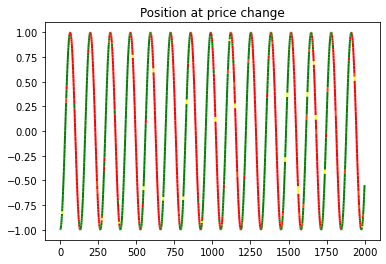

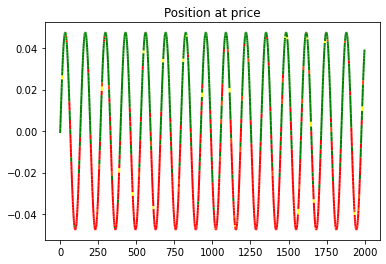

In [120]:
action_mem = pd.DataFrame(agent.action_memory)- 2
chg = np.array(agent.state_memory)[:,0]

annotation = pd.DataFrame(action_mem.values, columns = {"pos"})
to_join = pd.DataFrame({'col_map': ['red', 'orangered', 'yellow', 'lightgreen', 'green'],
                        'pos': [-2, -1, 0, 1, 2]})
c = annotation.merge(to_join, on='pos', how='left')["col_map"]
x = np.linspace(0, len(chg), len(chg)+1)
lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(x[:-1], chg[:-1], x[1:], chg[1:])]
colored_lines = LineCollection(lines, colors=c, linewidths=(2,))

fig, ax = plt.subplots(1)
ax.add_collection(colored_lines)
ax.autoscale_view()
plt.title("Position at price change")
plt.show()

chg = np.array(agent.state_memory)[:,1]

annotation = pd.DataFrame(action_mem.values, columns = {"pos"})
to_join = pd.DataFrame({'col_map': ['red', 'orangered', 'yellow', 'lightgreen', 'green'],
                        'pos': [-2, -1, 0, 1, 2]})
c = annotation.merge(to_join, on='pos', how='left')["col_map"]
x = np.linspace(0, len(chg), len(chg)+1)
lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(x[:-1], chg[:-1], x[1:], chg[1:])]
colored_lines = LineCollection(lines, colors=c, linewidths=(2,))

fig, ax = plt.subplots(1)
ax.add_collection(colored_lines)
ax.autoscale_view()
plt.title("Position at price")
plt.show()

In [121]:
agent.rlplot("Training Progress: Simple Harmonic Motion")

In [54]:
chg[:-1]

array([0.03885669, 0.03884141, 0.03882597, ..., 0.01648487, 0.01641351,
       0.01634209])

In [3]:
prices = ffn.get('aapl', start = '2018-01-01')

In [1102]:
# initialize market
n_time_points = 1000
env = StockEnvironment(prices = prices, n_time_points = n_time_points)
env.simulate_prices()
agent_params = {"n_layers": 2, "n_units": 16, "n_features": 2, "batch_size": 1,
                                        "dense_units": 1, "n_timepoints": 16, "n_epochs": 50}
agent = RLStockAgent(epsilon = 0.1, nn_parameters = agent_params)
for episode in range(1):
    state, reward = env.reset()
#     for i in range(100):
#         action = 0
#         state, reward = env.step(action = action)
    for i in range(n_time_points):
        state, reward = env.step(action = action)
        agent.update(state, reward, random_action = True)
        action = agent.position

agent.train_model()
#agent.reset_data()

Iteration:      1,   Func. Count:     13,   Neg. LLF: 9067.116520986934
Iteration:      2,   Func. Count:     29,   Neg. LLF: 59647.887185441556
Iteration:      3,   Func. Count:     45,   Neg. LLF: 42310.134861608436
Iteration:      4,   Func. Count:     61,   Neg. LLF: 64037.799845733054
Iteration:      5,   Func. Count:     76,   Neg. LLF: 29897.61131514558
Iteration:      6,   Func. Count:     90,   Neg. LLF: 30172.708662404104
Iteration:      7,   Func. Count:    104,   Neg. LLF: 51858.84206016213
Iteration:      8,   Func. Count:    119,   Neg. LLF: 31938.387292510022
Iteration:      9,   Func. Count:    133,   Neg. LLF: 51623.33048718967
Iteration:     10,   Func. Count:    147,   Neg. LLF: 3255.454092518141
Iteration:     11,   Func. Count:    160,   Neg. LLF: 3997.319233109724
Iteration:     12,   Func. Count:    174,   Neg. LLF: 2193.200863152285
Iteration:     13,   Func. Count:    187,   Neg. LLF: 2136.668687237723
Iteration:     14,   Func. Count:    199,   Neg. LLF: 2136.

[====================] 100%Epoch 1/50
4124/4124 - 14s - loss: 3.2904e-04
Epoch 2/50
4124/4124 - 14s - loss: 3.3221e-04
Epoch 3/50
4124/4124 - 14s - loss: 2.9298e-04
Epoch 4/50
4124/4124 - 14s - loss: 3.5008e-04
Epoch 5/50
4124/4124 - 14s - loss: 3.2437e-04
Epoch 6/50
4124/4124 - 14s - loss: 3.3529e-04
Epoch 7/50
4124/4124 - 14s - loss: 2.8202e-04
Epoch 8/50
4124/4124 - 14s - loss: 3.1428e-04
Epoch 9/50
4124/4124 - 14s - loss: 2.9425e-04
Epoch 10/50
4124/4124 - 14s - loss: 2.9707e-04
Epoch 11/50
4124/4124 - 14s - loss: 3.5698e-04
Epoch 12/50
4124/4124 - 14s - loss: 2.8826e-04
Epoch 13/50
4124/4124 - 14s - loss: 2.9864e-04
Epoch 14/50
4124/4124 - 14s - loss: 2.8975e-04
Epoch 15/50
4124/4124 - 15s - loss: 3.0028e-04
Epoch 16/50
4124/4124 - 14s - loss: 3.2648e-04
Epoch 17/50
4124/4124 - 14s - loss: 2.9864e-04
Epoch 18/50
4124/4124 - 14s - loss: 3.3257e-04
Epoch 19/50
4124/4124 - 14s - loss: 3.0724e-04
Epoch 20/50
4124/4124 - 15s - loss: 2.8548e-04
Epoch 21/50
4124/4124 - 15s - loss: 3.0685

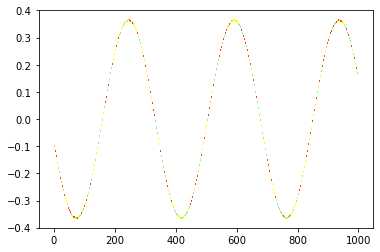

82.44615229397104


In [1104]:
plt_data = np.ndarray(shape = (0, 6))
for episode in range(1):
    state, reward = env.reset()

#     for i in range(80):
#         agent.position = 0
#         action = agent.position
#         state, reward = env.step(action)
#         if i > 2:
#             agent.store_data(state)
    agent_reward = 0
    preds_diff = 0

    for time in range(n_time_points):
        state, reward = env.step(action)
        agent.update(state, reward, random_action = False)
        action = agent.position
        agent_reward += reward
        j = (time + 1) / (n_time_points)
        sys.stdout.write('\r')
        sys.stdout.write("[%-20s] %d%%" % ('='*int(20*j), 100*j))
        preds_diff += np.abs(agent.predicted_reward - reward)
    env.reset()
    agent.train_model()
    plt_data = np.vstack((plt_data, agent.data))
    print("total reward: ", agent_reward)
    print("predicte rew: ", preds_diff)
    
    annotation = pd.DataFrame(agent.data[:,-2], columns = {"pos"})
    to_join = pd.DataFrame({'col_map': ['red', 'orangered', 'yellow', 'lightgreen', 'green'],
                            'pos': [-2, -1, 0, 1, 2]})
    c = annotation.merge(to_join, on='pos', how='left')["col_map"]
    x = np.linspace(0, agent.data[-n_time_points:,:].shape[0], agent.data[-n_time_points:,:].shape[0]+1)
    lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(x[:-1], agent.data[-n_time_points:-1, -3], x[1:], agent.data[-n_time_points:, -3])]
    colored_lines = LineCollection(lines, colors=c, linewidths=(2,))

    fig, ax = plt.subplots(1)
    ax.add_collection(colored_lines)
    ax.autoscale_view()
    plt.show()

    print(agent.data[-n_time_points:,-1].sum())
    #agent.reset_data()


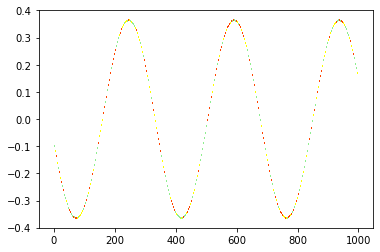

63.45814048967269


In [940]:
annotation = pd.DataFrame(agent.data[:,-2], columns = {"pos"})
to_join = pd.DataFrame({'col_map': ['red', 'orangered', 'yellow', 'lightgreen', 'green'],
                        'pos': [-2, -1, 0, 1, 2]})
c = annotation.merge(to_join, on='pos', how='left')["col_map"]
x = np.linspace(0, agent.data[-n_time_points:,:].shape[0], agent.data[-n_time_points:,:].shape[0]+1)
lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(x[:-1], agent.data[-n_time_points:-1, -3], x[1:], agent.data[-n_time_points:, -3])]
colored_lines = LineCollection(lines, colors=c, linewidths=(2,))

fig, ax = plt.subplots(1)
ax.add_collection(colored_lines)
ax.autoscale_view()
plt.show()

In [1053]:
unique, counts = np.unique(plt_data[:,-2], return_counts=True)
result = np.column_stack((unique, counts/np.sum(counts))) 
print(result)

[[-1.          0.43603333]
 [ 0.          0.25622222]
 [ 1.          0.30774444]]


In [822]:
pd.DataFrame(plt_data, columns = ['ma1', 'ma2', 'trend_feature',
                                  'market_prices', 'position', 'reward']).to_feather('data/data_test.feather')